In [75]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

import torch
import kornia as K
from kornia.contrib import FaceDetector, FaceDetectorResult

# select the device and type
device = torch.device('cpu')  # use 'cuda:0'
dtype = torch.float32

In [77]:
# load the image and scale (if needed)
img_raw = cv2.imread('image.jpg', cv2.IMREAD_COLOR)

# preprocess
img = K.image_to_tensor(img_raw, keepdim=False).to(device, dtype)
img = K.color.bgr_to_rgb(img)

img_vis = K.tensor_to_image(img.byte().clone())  # to later visualise

(-0.5, 448.5, 448.5, -0.5)

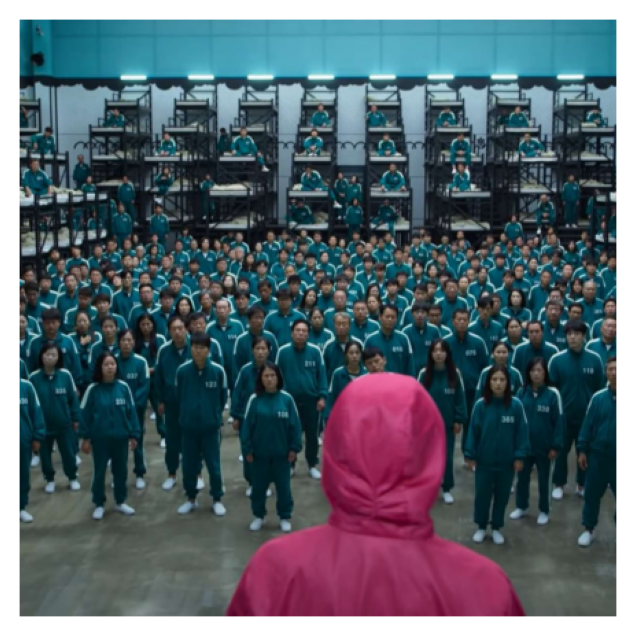

In [78]:
plt.figure(figsize=(8, 8))
plt.imshow(K.tensor_to_image(img.byte()))
plt.axis('off')

In [79]:
# create the detector and find the faces !
face_detection = FaceDetector().to(device, dtype)

with torch.no_grad():
    dets = face_detection(img)

# to decode later the detections
dets = [FaceDetectorResult(o) for o in dets]

In [80]:
# blurring paramters
k: int = 21     # kernel_size
s: float = 35.  # sigma

def apply_blur_face(img: torch.Tensor, img_vis: np.ndarray, det: FaceDetectorResult):
    # crop the face
    x1, y1 = det.xmin.int(), det.ymin.int()
    x2, y2 = det.xmax.int(), det.ymax.int()
    roi = img[..., y1:y2, x1:x2]

    # apply blurring and put back to the visualisation image
    roi = K.filters.gaussian_blur2d(roi, (k, k), (s, s))
    roi = K.color.rgb_to_bgr(roi)
    img_vis[y1:y2, x1:x2] = K.tensor_to_image(roi)

In [105]:
test = 0

for b in dets:
    
    
    for i in range(len(b.score)):
        if b.score[i] < 0.6:
            continue
        # draw face bounding box around each detected face
        # x1, y1 = b.top_left.int().tolist()
        # x2, y2 = b.bottom_right.int().tolist()
        print(b.top_left.int().tolist())
        x1 = b.top_left.int().tolist()
        x2 = b.bottom_right.int().tolist()
        
        img_vis = cv2.rectangle(img_vis, (x1, y1), (x2, y2), (0, 255, 0), 4)

        # blur the detected faces
        apply_blur_face(img, img_vis, b)

    
    # if b.score < 0.6:  # skip detections with lower score
    #     continue
    
    

plt.figure(figsize=(8, 8))
plt.imshow(img_vis)
plt.axis('off')

# save and show image
cv2.imwrite('img_out.jpg', img_vis)

[[205, 228], [24, 247], [404, 230], [349, 264], [271, 217], [182, 260], [116, 227], [244, 244], [65, 252], [376, 230], [79, 235], [94, 225], [322, 220], [353, 245], [150, 212], [122, 213], [393, 205], [31, 192], [361, 228], [68, 225], [177, 240], [175, 219], [7, 202], [377, 256], [240, 192], [94, 201], [110, 207], [103, 236], [236, 222], [371, 131], [381, 227], [352, 213], [118, 244], [388, 221], [13, 204], [408, 217], [273, 205], [185, 207], [280, 208], [375, 158], [364, 205], [182, 200], [224, 206], [282, 192], [293, 214], [192, 184], [349, 227], [344, 206], [164, 206], [391, 214], [48, 223]]


NameError: name 'y1' is not defined